In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [63]:
ms_posts_may = pd.read_csv('../data/raw/statuses_may2025_1k.csv')
ms_posts_may.head()

,id,uri,url,in_reply_to_id,in_reply_to_account_id,reblog,content,created_at,reblogs_count,favourites_count,...,poll.id,poll.expires_at,poll.expired,poll.multiple,poll.votes_count,poll.voted,poll.options,poll.emojis,poll.own_votes,poll.voters_count
0,114585434312751838,https://threads.net/ap/users/17841459235309838...,https://www.threads.com/@gulf.careerhunt/post/...,1.145854e+17,1.141669e+17,NaN,"<p>APPLY HERE <br><a href=""https://gulfcareerh...",2025-05-28 12:07:38+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,114585434286693109,https://mastodon.social/users/kkgwins09/status...,https://mastodon.social/@kkgwins09/11458543428...,NaN,NaN,NaN,NaN,2025-05-28 12:22:51.417000+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114585434257153967,https://mastodont.cat/users/aldarull/statuses/...,https://mastodont.cat/@aldarull/11458543418423...,NaN,NaN,NaN,<p>💥📚 Setzè Aniversari Llibreria Aldarull 📚💥</...,2025-05-28 12:22:49+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,114585434224628814,https://mstdn.jp/users/wfhtony/statuses/114585...,https://mstdn.jp/@wfhtony/114585433581326493,NaN,NaN,NaN,<p>七月的JJC不能閘了（</p>,2025-05-28 12:22:40+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,114585434219758944,https://threads.net/ap/users/17841400626370033...,https://www.threads.com/@_eileenie_/post/DKMli...,NaN,NaN,NaN,"<p><a href=""https://www.dailymail.co.uk/news/a...",2025-05-28 12:07:33+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
from pathlib import Path


In [65]:
keep_cols = [
    'id',
    'created_at',
    'account.id',
    'account.acct',
    'account.username',
    "account.followers_count",
    "account.following_count",
    "account.statuses_count",
    'reblogs_count',
    'favourites_count',
    'replies_count',      
    'tag_list'
]
ms_posts_may_clean = ms_posts_may[keep_cols].copy()   
out_path = '../data/processed/statuses_may2025_clean.csv'
Path(out_path).parent.mkdir(parents=True, exist_ok=True)
ms_posts_may_clean.to_csv(out_path, index=False)

In [66]:
ms_posts_may_clean.head()

,id,created_at,account.id,account.acct,account.username,account.followers_count,account.following_count,account.statuses_count,reblogs_count,favourites_count,replies_count,tag_list
0,114585434312751838,2025-05-28 12:07:38+00:00,114166863801324229,gulf.careerhunt@threads.net,gulf.careerhunt,87949,31,22828,0,0,0,[]
1,114585434286693109,2025-05-28 12:22:51.417000+00:00,110387198360636667,kkgwins09,kkgwins09,38,120,5897,0,0,0,[]
2,114585434257153967,2025-05-28 12:22:49+00:00,108209072066903020,aldarull@mastodont.cat,aldarull,957,312,350,0,0,0,[]
3,114585434224628814,2025-05-28 12:22:40+00:00,109844269487844229,wfhtony@mstdn.jp,wfhtony,105,501,3717,0,0,0,[]
4,114585434219758944,2025-05-28 12:07:33+00:00,112208905527015290,_eileenie_@threads.net,_eileenie_,857,700,64638,0,0,0,[]


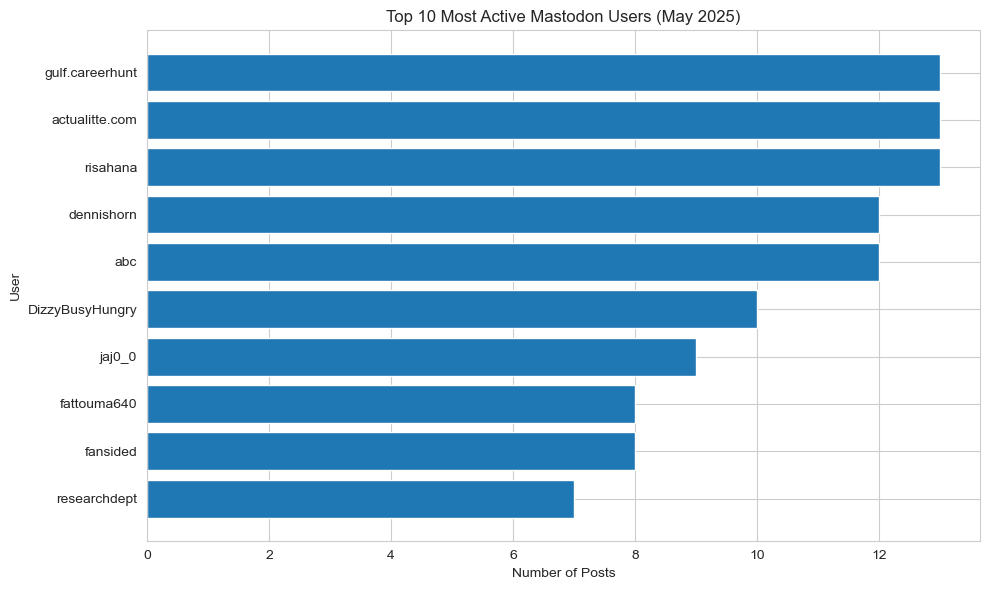

In [67]:
post_counts = (
    ms_posts_may_clean['account.username']
    .value_counts()
    .head(10)
    .sort_values()
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(post_counts.index, post_counts.values)
ax.set_xlabel('Number of Posts')
ax.set_ylabel('User')
ax.set_title('Top 10 Most Active Mastodon Users (May 2025)')
plt.tight_layout()
plt.show()

In [68]:
post_counts

account.username
researchdept        7
fansided            8
fattouma640         8
jaj0_0              9
DizzyBusyHungry    10
abc                12
dennishorn         12
risahana           13
actualitte.com     13
gulf.careerhunt    13
Name: count, dtype: int64

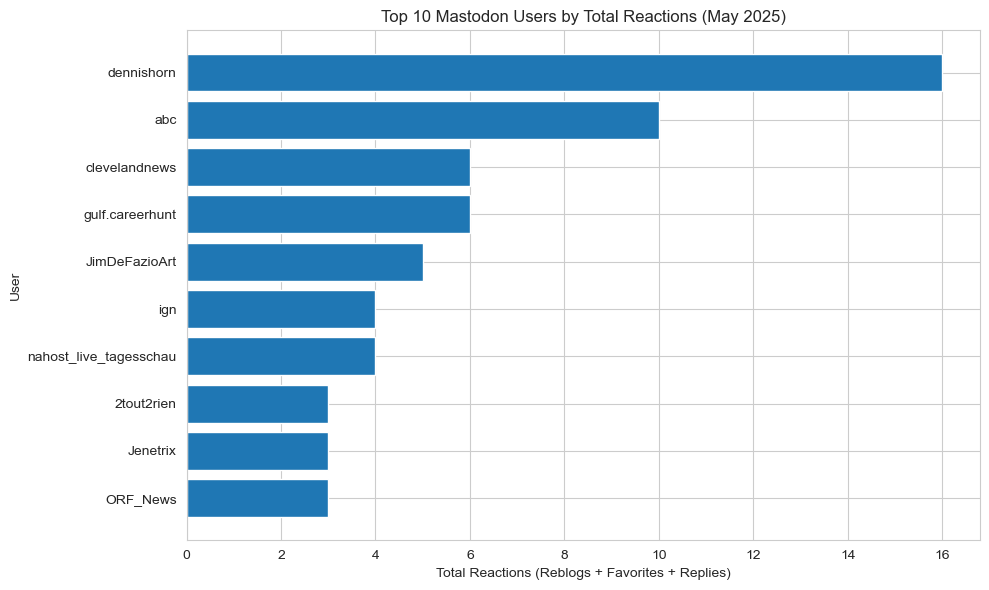

In [69]:
ms_posts_may_clean['total_reactions'] = (
    ms_posts_may_clean['reblogs_count'] +
    ms_posts_may_clean['favourites_count'] +
    ms_posts_may_clean['replies_count']
)

user_stats = (
    ms_posts_may_clean
    .groupby('account.username')
    .agg(
        total_reactions=('total_reactions', 'sum'),
        post_count=('id', 'count')
    )
    .reset_index()
)

top_by_reactions = (
    user_stats.nlargest(10, 'total_reactions')
    .set_index('account.username')
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    top_by_reactions.index[::-1],
    top_by_reactions['total_reactions'][::-1]
)
ax.set_xlabel('Total Reactions (Reblogs + Favorites + Replies)')
ax.set_ylabel('User')
ax.set_title('Top 10 Mastodon Users by Total Reactions (May 2025)')
plt.tight_layout()
plt.show()

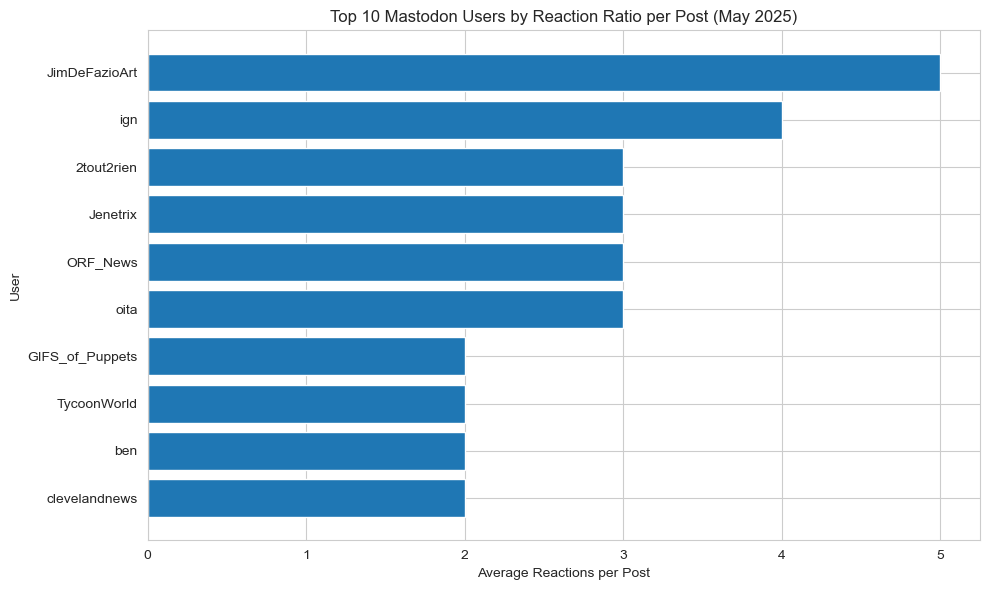

In [70]:
user_stats['reaction_ratio'] = (
    user_stats['total_reactions'] / user_stats['post_count']
)

top_by_ratio = (
    user_stats.nlargest(10, 'reaction_ratio')
    .set_index('account.username')
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    top_by_ratio.index[::-1],
    top_by_ratio['reaction_ratio'][::-1]
)
ax.set_xlabel('Average Reactions per Post')
ax.set_ylabel('User')
ax.set_title('Top 10 Mastodon Users by Reaction Ratio per Post (May 2025)')
plt.tight_layout()
plt.show()

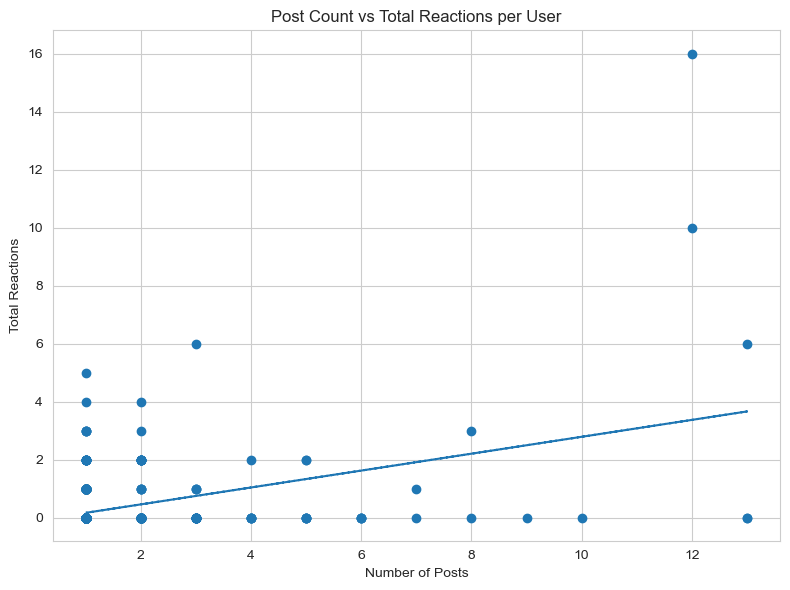

Spearman r (posts vs total reactions): 0.10, p=0.005


In [71]:
from scipy.stats import pearsonr, spearmanr

# Post count vs Total reactions
x1, y1 = user_stats['post_count'], user_stats['total_reactions']
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x1, y1)
m1, b1 = np.polyfit(x1, y1, 1)
ax.plot(x1, m1*x1 + b1, linestyle='--')
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Total Reactions')
ax.set_title('Post Count vs Total Reactions per User')
plt.tight_layout()
plt.show()
r1, p1 = spearmanr(x1, y1)
print(f'Spearman r (posts vs total reactions): {r1:.2f}, p={p1:.3f}')

In [72]:
r1_pearson, p1_pearson = pearsonr(x1, y1)
print(f'Pearson r (posts vs total reactions): {r1_pearson:.2f}, p={p1_pearson:.3f}')

Pearson r (posts vs total reactions): 0.41, p=0.000


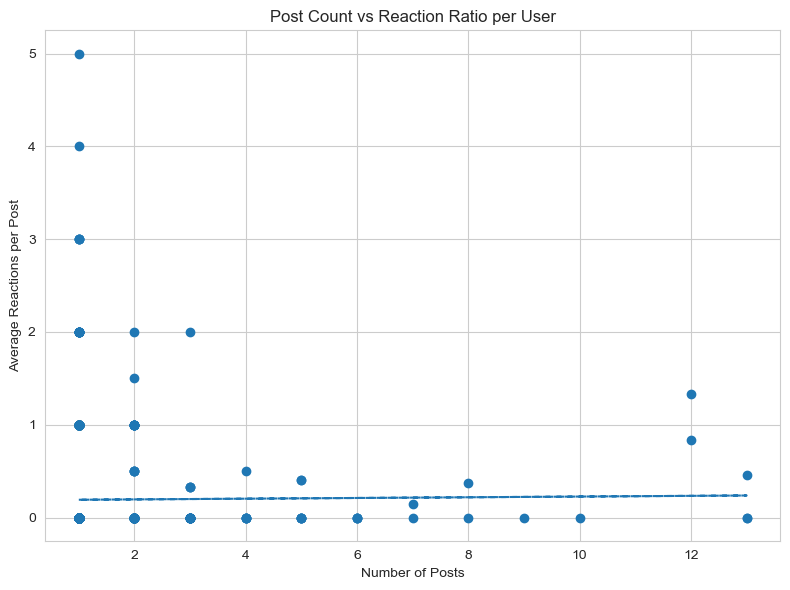

Spearman r (posts vs reaction ratio): 0.07, p=0.072


In [73]:
x2, y2 = user_stats['post_count'], user_stats['reaction_ratio']
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x2, y2)
m2, b2 = np.polyfit(x2, y2, 1)
ax.plot(x2, m2*x2 + b2, linestyle='--')
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Average Reactions per Post')
ax.set_title('Post Count vs Reaction Ratio per User')
plt.tight_layout()
plt.show()
r2, p2 = spearmanr(x2, y2)
print(f'Spearman r (posts vs reaction ratio): {r2:.2f}, p={p2:.3f}')

In [74]:
ms_posts_may_clean.head(10)

,id,created_at,account.id,account.acct,account.username,account.followers_count,account.following_count,account.statuses_count,reblogs_count,favourites_count,replies_count,tag_list,total_reactions
0,114585434312751838,2025-05-28 12:07:38+00:00,114166863801324229,gulf.careerhunt@threads.net,gulf.careerhunt,87949,31,22828,0,0,0,[],0
1,114585434286693109,2025-05-28 12:22:51.417000+00:00,110387198360636667,kkgwins09,kkgwins09,38,120,5897,0,0,0,[],0
2,114585434257153967,2025-05-28 12:22:49+00:00,108209072066903020,aldarull@mastodont.cat,aldarull,957,312,350,0,0,0,[],0
3,114585434224628814,2025-05-28 12:22:40+00:00,109844269487844229,wfhtony@mstdn.jp,wfhtony,105,501,3717,0,0,0,[],0
4,114585434219758944,2025-05-28 12:07:33+00:00,112208905527015290,_eileenie_@threads.net,_eileenie_,857,700,64638,0,0,0,[],0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,1603,76,1881,0,0,0,"['melder', 'drogenhandel', 'leipzig', 'polizei...",0
6,114585434184558523,2025-05-28 12:22:44+00:00,647512,jaj0_0@mstdn.love,jaj0_0,2074,80,32447,0,0,0,[],0
7,114585434182680039,2025-05-28 12:22:46+00:00,111947943914140595,Kahte@masto.bike,Kahte,441,537,213904,0,0,0,[],0
8,114585434143545714,2025-05-28 12:22:48+00:00,110475461227647928,vijesti@mastodon.hr,vijesti,11,7,111018,0,0,0,[],0
9,114585434091606191,2025-05-28 12:22:47.313000+00:00,113540068034377893,rjszczerba.bsky.social@bsky.brid.gy,rjszczerba.bsky.social,2,30,4,0,0,0,[],0


In [75]:
df_tags = ms_posts_may_clean.explode('tag_list')
df_tags.head(10)

,id,created_at,account.id,account.acct,account.username,account.followers_count,account.following_count,account.statuses_count,reblogs_count,favourites_count,replies_count,tag_list,total_reactions
0,114585434312751838,2025-05-28 12:07:38+00:00,114166863801324229,gulf.careerhunt@threads.net,gulf.careerhunt,87949,31,22828,0,0,0,[],0
1,114585434286693109,2025-05-28 12:22:51.417000+00:00,110387198360636667,kkgwins09,kkgwins09,38,120,5897,0,0,0,[],0
2,114585434257153967,2025-05-28 12:22:49+00:00,108209072066903020,aldarull@mastodont.cat,aldarull,957,312,350,0,0,0,[],0
3,114585434224628814,2025-05-28 12:22:40+00:00,109844269487844229,wfhtony@mstdn.jp,wfhtony,105,501,3717,0,0,0,[],0
4,114585434219758944,2025-05-28 12:07:33+00:00,112208905527015290,_eileenie_@threads.net,_eileenie_,857,700,64638,0,0,0,[],0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,1603,76,1881,0,0,0,"['melder', 'drogenhandel', 'leipzig', 'polizei...",0
6,114585434184558523,2025-05-28 12:22:44+00:00,647512,jaj0_0@mstdn.love,jaj0_0,2074,80,32447,0,0,0,[],0
7,114585434182680039,2025-05-28 12:22:46+00:00,111947943914140595,Kahte@masto.bike,Kahte,441,537,213904,0,0,0,[],0
8,114585434143545714,2025-05-28 12:22:48+00:00,110475461227647928,vijesti@mastodon.hr,vijesti,11,7,111018,0,0,0,[],0
9,114585434091606191,2025-05-28 12:22:47.313000+00:00,113540068034377893,rjszczerba.bsky.social@bsky.brid.gy,rjszczerba.bsky.social,2,30,4,0,0,0,[],0


In [76]:
import ast

ms_posts_may_clean['tag_list'] = ms_posts_may_clean['tag_list'].apply(
    lambda cell: ast.literal_eval(cell) if isinstance(cell, str) else cell
)

df_tags = ms_posts_may_clean.explode('tag_list')
df_tags.head(10)


,id,created_at,account.id,account.acct,account.username,account.followers_count,account.following_count,account.statuses_count,reblogs_count,favourites_count,replies_count,tag_list,total_reactions
0,114585434312751838,2025-05-28 12:07:38+00:00,114166863801324229,gulf.careerhunt@threads.net,gulf.careerhunt,87949,31,22828,0,0,0,NaN,0
1,114585434286693109,2025-05-28 12:22:51.417000+00:00,110387198360636667,kkgwins09,kkgwins09,38,120,5897,0,0,0,NaN,0
2,114585434257153967,2025-05-28 12:22:49+00:00,108209072066903020,aldarull@mastodont.cat,aldarull,957,312,350,0,0,0,NaN,0
3,114585434224628814,2025-05-28 12:22:40+00:00,109844269487844229,wfhtony@mstdn.jp,wfhtony,105,501,3717,0,0,0,NaN,0
4,114585434219758944,2025-05-28 12:07:33+00:00,112208905527015290,_eileenie_@threads.net,_eileenie_,857,700,64638,0,0,0,NaN,0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,1603,76,1881,0,0,0,melder,0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,1603,76,1881,0,0,0,drogenhandel,0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,1603,76,1881,0,0,0,leipzig,0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,1603,76,1881,0,0,0,polizei,0
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,1603,76,1881,0,0,0,spati,0


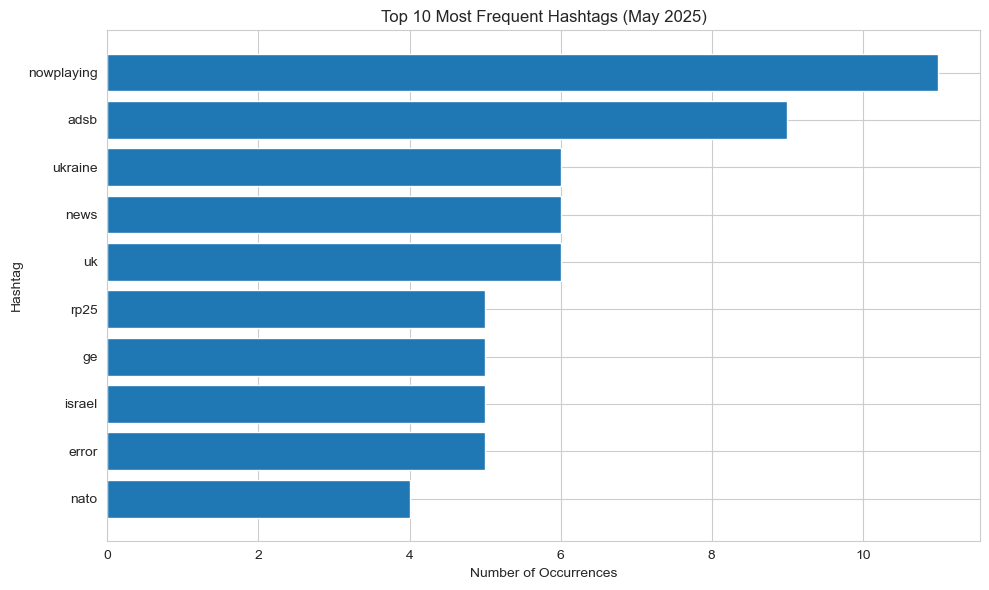

In [77]:
df_tags = df_tags[df_tags['tag_list'].notna() & (df_tags['tag_list'] != '')]

tag_counts = df_tags['tag_list'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(tag_counts.index[::-1], tag_counts.values[::-1])
ax.set_xlabel('Number of Occurrences')
ax.set_ylabel('Hashtag')
ax.set_title('Top 10 Most Frequent Hashtags (May 2025)')
plt.tight_layout()
plt.show()

In [78]:
import numpy as np
from scipy.stats import mannwhitneyu

In [79]:
ms_posts_may_clean['has_hashtag'] = ms_posts_may_clean['tag_list'].apply(lambda tags: len(tags) > 0)
ms_posts_may_clean.head(10)

,id,created_at,account.id,account.acct,account.username,account.followers_count,account.following_count,account.statuses_count,reblogs_count,favourites_count,replies_count,tag_list,total_reactions,has_hashtag
0,114585434312751838,2025-05-28 12:07:38+00:00,114166863801324229,gulf.careerhunt@threads.net,gulf.careerhunt,87949,31,22828,0,0,0,[],0,False
1,114585434286693109,2025-05-28 12:22:51.417000+00:00,110387198360636667,kkgwins09,kkgwins09,38,120,5897,0,0,0,[],0,False
2,114585434257153967,2025-05-28 12:22:49+00:00,108209072066903020,aldarull@mastodont.cat,aldarull,957,312,350,0,0,0,[],0,False
3,114585434224628814,2025-05-28 12:22:40+00:00,109844269487844229,wfhtony@mstdn.jp,wfhtony,105,501,3717,0,0,0,[],0,False
4,114585434219758944,2025-05-28 12:07:33+00:00,112208905527015290,_eileenie_@threads.net,_eileenie_,857,700,64638,0,0,0,[],0,False
5,114585434193073776,2025-05-28 12:22:20+00:00,109299091794417958,lz@social.anoxinon.de,lz,1603,76,1881,0,0,0,"[melder, drogenhandel, leipzig, polizei, spati]",0,True
6,114585434184558523,2025-05-28 12:22:44+00:00,647512,jaj0_0@mstdn.love,jaj0_0,2074,80,32447,0,0,0,[],0,False
7,114585434182680039,2025-05-28 12:22:46+00:00,111947943914140595,Kahte@masto.bike,Kahte,441,537,213904,0,0,0,[],0,False
8,114585434143545714,2025-05-28 12:22:48+00:00,110475461227647928,vijesti@mastodon.hr,vijesti,11,7,111018,0,0,0,[],0,False
9,114585434091606191,2025-05-28 12:22:47.313000+00:00,113540068034377893,rjszczerba.bsky.social@bsky.brid.gy,rjszczerba.bsky.social,2,30,4,0,0,0,[],0,False


In [89]:
no_hashtag = ms_posts_may_clean[ms_posts_may_clean['has_hashtag']==False]['total_reactions']
yes_hashtag = ms_posts_may_clean[ms_posts_may_clean['has_hashtag']==True]['total_reactions']
print(no_hashtag.mean())
print(yes_hashtag.mean())
u_stat, p_value = mannwhitneyu(yes_hashtag, no_hashtag)
print(f'Mann-Whitney U statistic: {u_stat}, p-value: {p_value:.3f}')

0.18092566619915848
0.24041811846689895
Mann-Whitney U statistic: 105133.5, p-value: 0.284


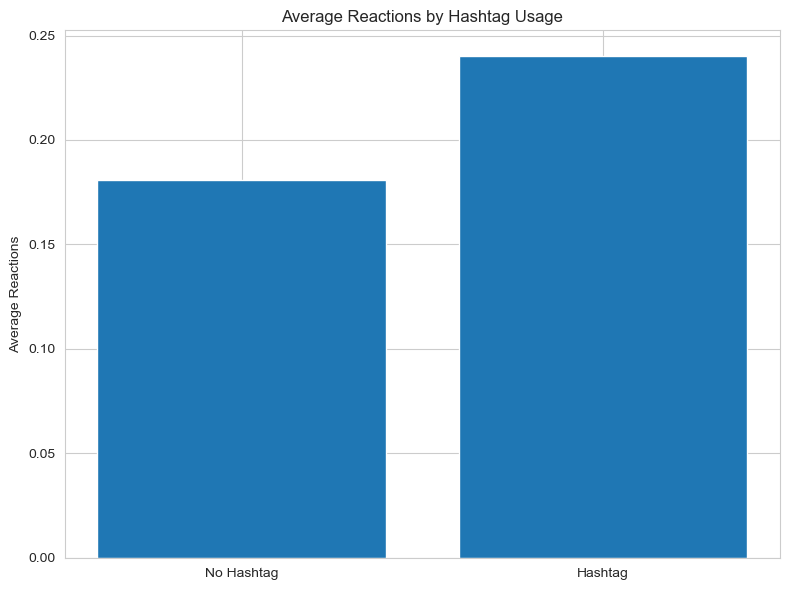

In [81]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar([0, 1], [no_hashtag.mean(), yes_hashtag.mean()], tick_label=['No Hashtag','Hashtag'])
ax.set_ylabel('Average Reactions')
ax.set_title('Average Reactions by Hashtag Usage')
plt.tight_layout()
plt.show()

In [90]:
U, p = mannwhitneyu(yes_hashtag, no_hashtag)
print(f"Mann-Whitney U = {U:.1f}, p-value = {p:.3f}")


Mann-Whitney U = 105133.5, p-value = 0.284


In [83]:
tag_counts = df_tags['tag_list'].value_counts()
popular_tags = tag_counts.index[:10].tolist()
popular_tags

['nowplaying',
 'adsb',
 'ukraine',
 'news',
 'uk',
 'rp25',
 'ge',
 'israel',
 'error',
 'nato']

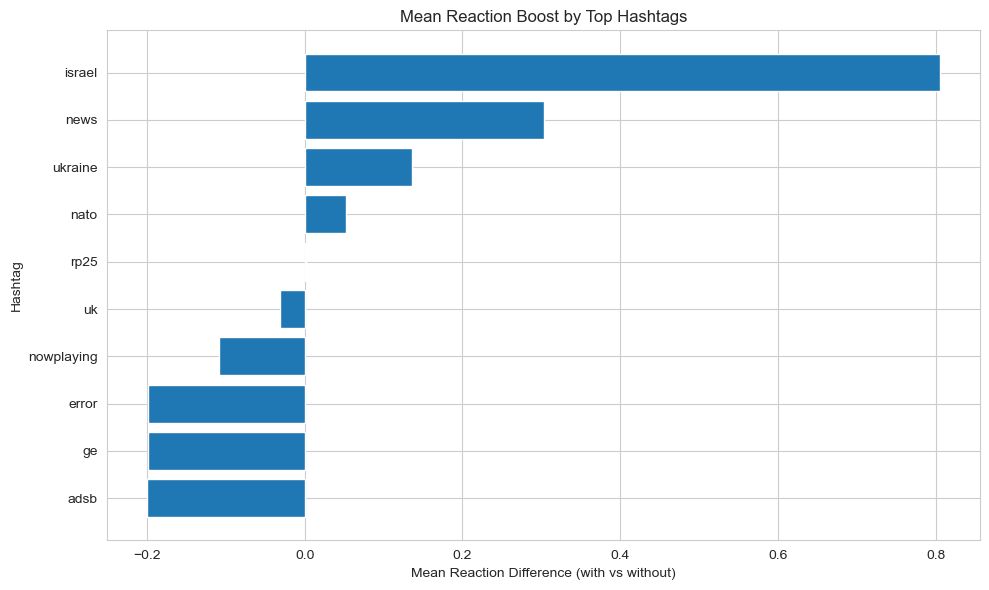

,n_posts,mean_with,mean_without,mean_diff,p_value
hashtag,,,,,
adsb,9,0.000000,0.199798,-0.199798,0.905353
ge,5,0.000000,0.198995,-0.198995,0.835711
error,5,0.000000,0.198995,-0.198995,0.835711
nowplaying,11,0.090909,0.199191,-0.108282,0.742139
uk,6,0.166667,0.198189,-0.031522,0.494667
rp25,5,0.200000,0.197990,0.002010,0.416916
nato,4,0.250000,0.197791,0.052209,0.325451
ukraine,6,0.333333,0.197183,0.136150,0.136260
news,6,0.500000,0.196177,0.303823,0.014585


In [84]:
results = []
for tag in popular_tags:
    has_t = ms_posts_may_clean[ms_posts_may_clean['tag_list'].apply(lambda tags: tag in tags)]['total_reactions']
    no_t  = ms_posts_may_clean[~ms_posts_may_clean['tag_list'].apply(lambda tags: tag in tags)]['total_reactions']
    mean_with = has_t.mean()
    mean_without = no_t.mean()
    diff = mean_with - mean_without
    U_t, p_t = mannwhitneyu(has_t, no_t, alternative='greater')
    results.append({
        'hashtag': tag,
        'n_posts': len(has_t),
        'mean_with': mean_with,
        'mean_without': mean_without,
        'mean_diff': diff,
        'p_value': p_t
    })

res_df = pd.DataFrame(results).set_index('hashtag').sort_values('mean_diff')

# Bar chart: mean_diff for each tag
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(res_df.index, res_df['mean_diff'])
ax.set_xlabel('Mean Reaction Difference (with vs without)')
ax.set_ylabel('Hashtag')
ax.set_title('Mean Reaction Boost by Top Hashtags')
plt.tight_layout()
plt.show()

# Display the summary table
res_df

In [85]:
follower_stats = (
    ms_posts_may_clean
    .sort_values('created_at')            # ensure chronological order
    .groupby('account.id', as_index=False)  # one row per user
    .last()[['account.username', 'account.statuses_count', 'account.followers_count']]
    .rename(columns={
        'account.username': 'username',
        'account.statuses_count': 'total_statuses',
        'account.followers_count': 'followers'
    })
)

follower_stats.head()

,username,total_statuses,followers
0,touaregtweet,31737,2962
1,ReneDamkot,35379,1734
2,poga,27226,5052
3,Lapizistik,17074,1107
4,georgieboy,2264,150


In [86]:
pearson_r, pearson_p = pearsonr(follower_stats['total_statuses'], follower_stats['followers'])
spearman_r, spearman_p = spearmanr(follower_stats['total_statuses'], follower_stats['followers'])

print(f'Pearson r  (statuses vs. followers): {pearson_r:.2f} (p = {pearson_p:.3f})')
print(f'Spearman r (statuses vs. followers): {spearman_r:.2f} (p = {spearman_p:.3f})')

Pearson r  (statuses vs. followers): 0.21 (p = 0.000)
Spearman r (statuses vs. followers): 0.52 (p = 0.000)


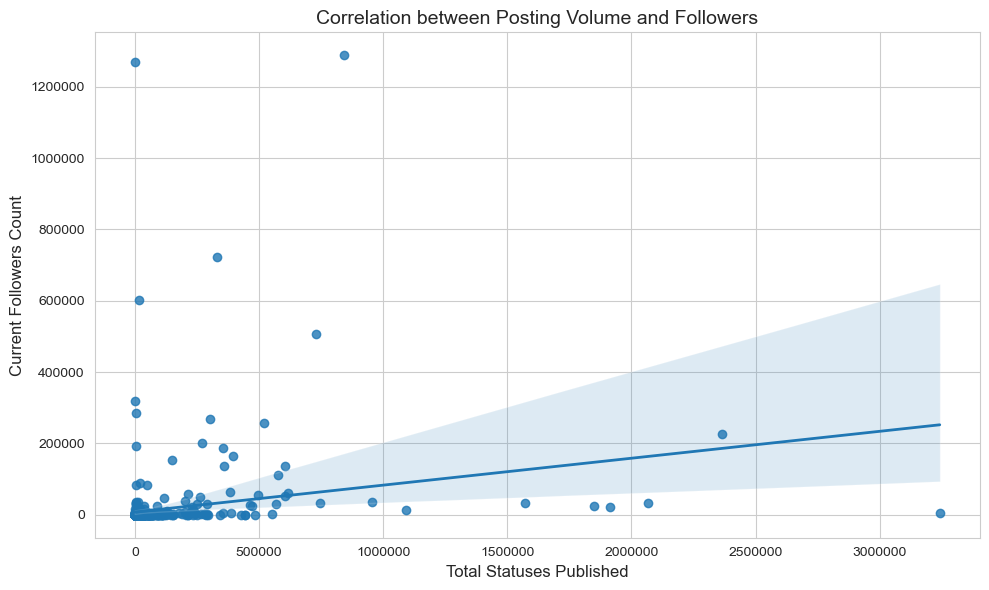

In [87]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(
    data=follower_stats,
    x='total_statuses',
    y='followers',
    scatter_kws={'alpha': 0.8},
    line_kws={'lw': 2}
)

# Axes & title styling
ax.set_xlabel('Total Statuses Published', fontsize=12)
ax.set_ylabel('Current Followers Count', fontsize=12)
ax.set_title('Correlation between Posting Volume and Followers', fontsize=14)
ax.ticklabel_format(style='plain')       
plt.tight_layout()
plt.show()

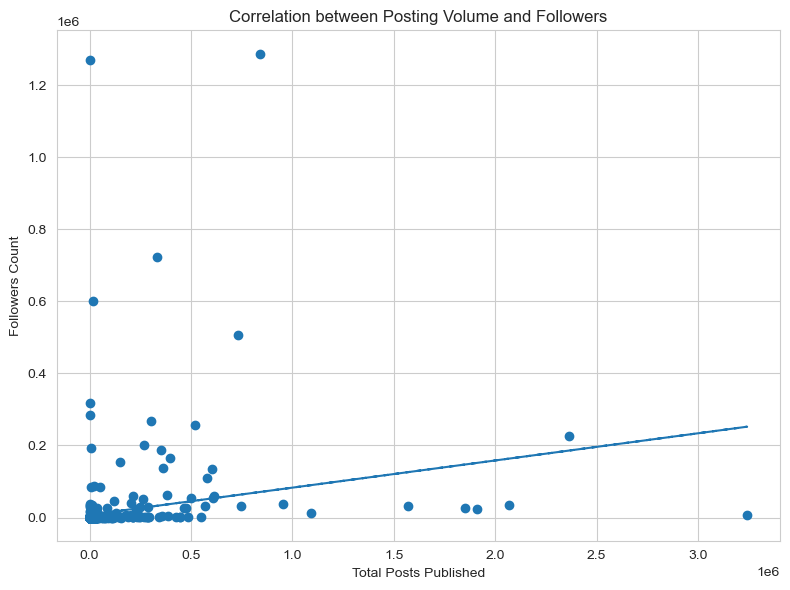

Spearman r (posts vs followers): 0.52, p=0.000


In [92]:
# Post count vs Total reactions
x1, y1 = follower_stats['total_statuses'], follower_stats['followers']
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x1, y1)
m1, b1 = np.polyfit(x1, y1, 1)
ax.plot(x1, m1*x1 + b1, linestyle='--')
ax.set_xlabel('Total Posts Published')
ax.set_ylabel('Followers Count')
ax.set_title('Correlation between Posting Volume and Followers')
plt.tight_layout()
plt.show()
r1, p1 = spearmanr(x1, y1)
print(f'Spearman r (posts vs followers): {r1:.2f}, p={p1:.3f}')